# DSCI 100 – Project Planning Stage  
## Saba Alipour – Group 7  

### Broad Question 2: Recruiting Players Who Are Most Likely to Contribute a Large Amount of Data

In [1]:
library(tidyverse)
library(janitor)
library(knitr)

options(readr.show_col_types = FALSE)

players <- read_csv("data/players.csv") |> clean_names()
sessions <- read_csv("data/sessions.csv") |> clean_names()

dim(players)
dim(sessions)

head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




[1] 196   7

[1] 1535    5

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


# 1. Data Description

This project uses two datasets collected from a UBC research Minecraft server. The **players.csv** dataset contains one row per player with demographic and experience information. The **sessions.csv** dataset contains one row per play session, including start and end times for each session. The datasets are linked by a hashed email identifier. Together, these data combine survey responses with automatically logged behaviour from the server.

In [2]:
players_vars <- tibble(variable = names(players),
                       type = sapply(players, class),
                       description = c("Self-reported Minecraft experience level.",
                                       "Whether the player subscribed to the project newsletter.",
                                       "Anonymized player identifier.",
                                       "Total number of hours played on the server.",
                                       "Player's chosen in-game name.",
                                       "Self-reported gender.",
                                       "Self-reported age."))

kable(players_vars, caption = "Variables in players.csv")



Table: Variables in players.csv

|variable     |type      |description                                              |
|:------------|:---------|:--------------------------------------------------------|
|experience   |character |Self-reported Minecraft experience level.                |
|subscribe    |logical   |Whether the player subscribed to the project newsletter. |
|hashed_email |character |Anonymized player identifier.                            |
|played_hours |numeric   |Total number of hours played on the server.              |
|name         |character |Player's chosen in-game name.                            |
|gender       |character |Self-reported gender.                                    |
|age          |numeric   |Self-reported age.                                       |

In [3]:
sessions_vars <- tibble(variable = names(sessions),
                        type = sapply(sessions, class),
                        description = c("Anonymized player identifier linked to players.csv.",
                                        "Start time of the session (character timestamp).",
                                        "End time of the session (character timestamp).",
                                        "Original large numeric start timestamp.",
                                        "Original large numeric end timestamp."))

kable(sessions_vars, caption = "Variables in sessions.csv")



Table: Variables in sessions.csv

|variable            |type      |description                                         |
|:-------------------|:---------|:---------------------------------------------------|
|hashed_email        |character |Anonymized player identifier linked to players.csv. |
|start_time          |character |Start time of the session (character timestamp).    |
|end_time            |character |End time of the session (character timestamp).      |
|original_start_time |numeric   |Original large numeric start timestamp.             |
|original_end_time   |numeric   |Original large numeric end timestamp.               |

In [4]:
players_num_summary <- players |>
summarise(across(where(is.numeric), list(mean = ~ round(mean(.x, na.rm = TRUE), 2),
                                         sd   = ~ round(sd(.x, na.rm = TRUE), 2),
                                         min  = ~ round(min(.x, na.rm = TRUE), 2),
                                         max  = ~ round(max(.x, na.rm = TRUE), 2))))

kable(players_num_summary, caption = "Summary statistics for numeric variables in players.csv")



Table: Summary statistics for numeric variables in players.csv

| played_hours_mean| played_hours_sd| played_hours_min| played_hours_max| age_mean| age_sd| age_min| age_max|
|-----------------:|---------------:|----------------:|----------------:|--------:|------:|-------:|-------:|
|              5.85|           28.36|                0|            223.1|    21.14|   7.39|       9|      58|

There are 196 rows and 7 variables in the `players` dataset. It includes both qualitative and quantitative factors. Qualitative variables include experience level, gender, and newsletter subscription, while quantitative variables include age and total hours played. The `sessions` dataset contains 1535 rows and 5 variables. Each player may have multiple sessions that are linked by their hashed email address. Some individuals who completed the sign-up survey do not have any recorded sessions, and a small group of players have extremely high total play hours, creating a right-skewed distribution. Some demographic variables contain missing values. Session timestamps are stored in both character and large numeric formats. Due to these features, the data will need to be aggregated, cleaned, and joined before analysis can be performed.

# 2. Questions

**Broad Question:**  
Which kinds of players are most likely to contribute a large amount of data to the Minecraft research server?

**Specific Question:**  
Can early player characteristics (experience level, age, gender, and newsletter subscription) predict whether a player will become a **high data contributor**, defined as being in the top 25% of players based on total play time aggregated from all their sessions?

To answer this question, I will join the player-level data (`players.csv`) with aggregated session-level summaries from `sessions.csv` using the hashed email identifier. This will create one row per player with the response variable (high vs. not-high contributor) and explanatory variables describing demographics and experience. This dataset will then be ready for a classification model in the final project stage.

# 3. Exploratory Data Analysis and Visualization

In this section, I compute simple summary statistics, perform minimal wrangling to prepare the data for exploration, and create visualizations to better understand patterns related to player behaviour and potential predictors of high data contribution.

In [5]:
sessions_player <- sessions |>
group_by(hashed_email) |>
summarise(n_sessions = n(),
          .groups = "drop")

players_eda <- players |>
left_join(sessions_player, by = "hashed_email")

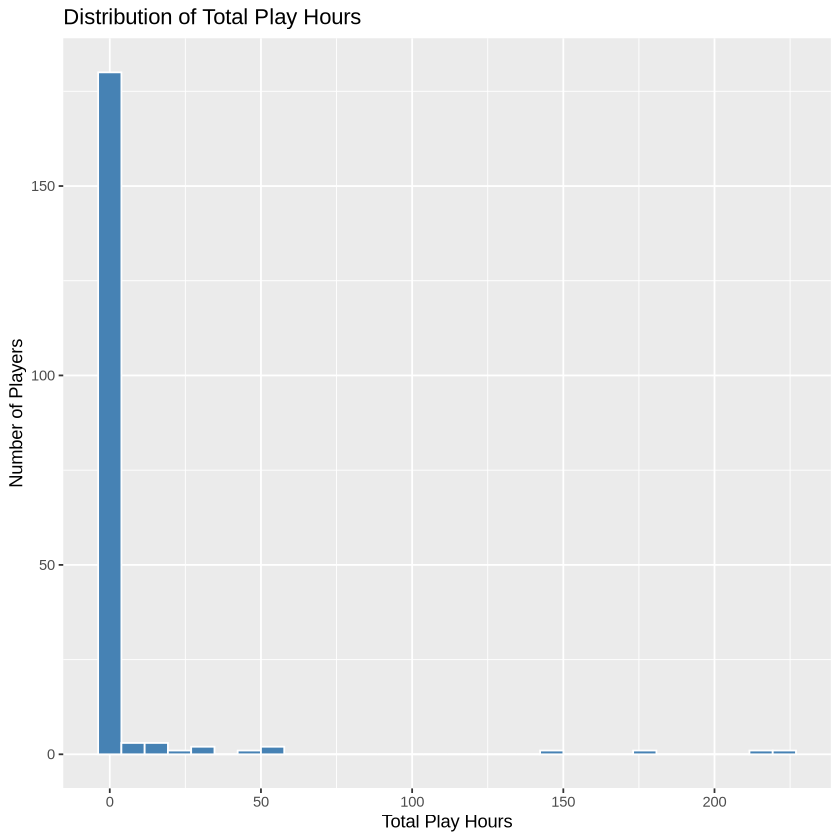

In [6]:
players_eda |>
ggplot(aes(x = played_hours)) +
geom_histogram(bins = 30, fill = "steelblue", color = "white") +
labs(title = "Distribution of Total Play Hours",
     x = "Total Play Hours",
     y = "Number of Players")

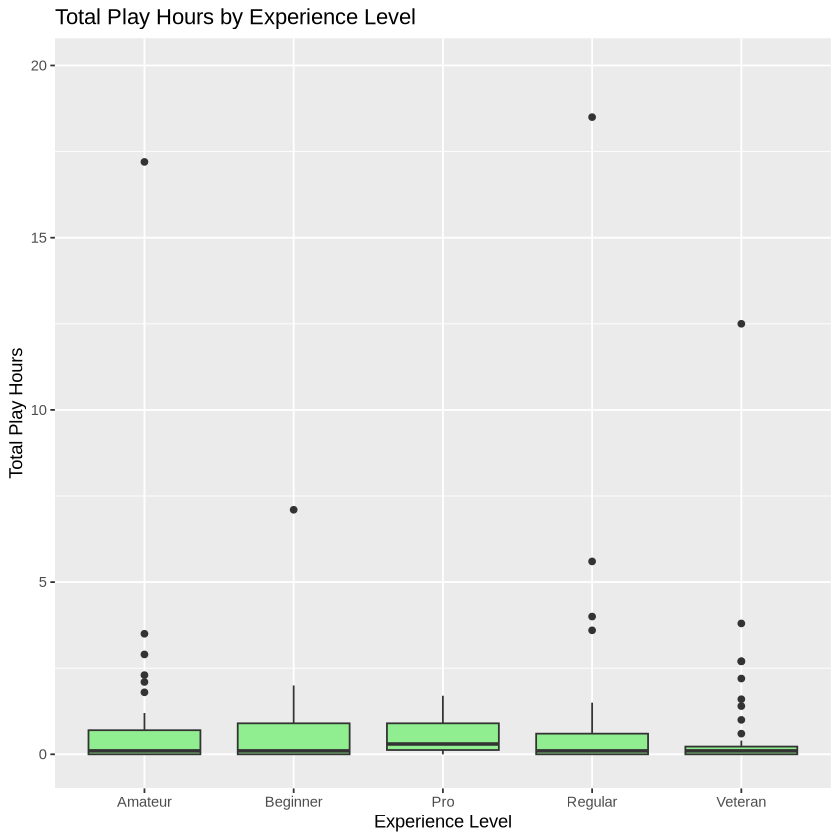

In [7]:
players_eda |>
ggplot(aes(x = experience, y = played_hours)) +
geom_boxplot(fill = "lightgreen") +
coord_cartesian(ylim = c(0, quantile(players$played_hours, 0.95))) +
labs(title = "Total Play Hours by Experience Level",
     x = "Experience Level",
     y = "Total Play Hours")

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


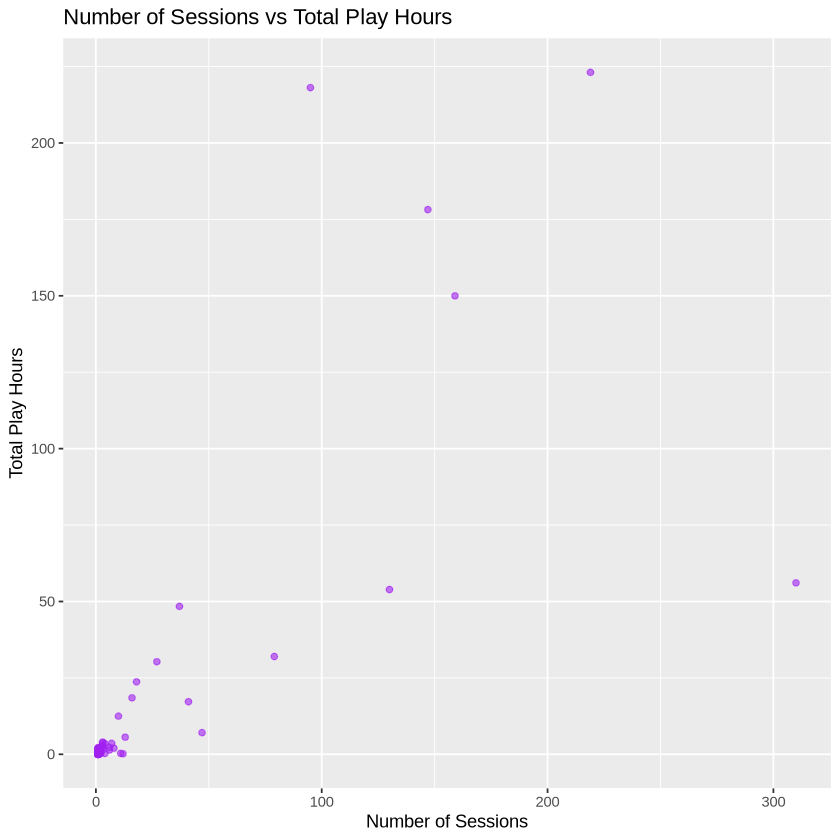

In [8]:
players_eda |>
ggplot(aes(x = n_sessions, y = played_hours)) +
geom_point(alpha = 0.6, color = "purple") +
labs(title = "Number of Sessions vs Total Play Hours",
     x = "Number of Sessions",
     y = "Total Play Hours")

(The missing values are automatically removed for this plot)

## 4. Methods and Planning

The main purpose of this study is to treat the problem as a classification task. I want to find out whether a player is in the top 25% of total play time (a high data contributor) or if they contribute less to the dataset. To try to predict this, I want to use a K-nearest neighbours (KNN) classifier with factors such as gender, age, experience level, newsletter subscription, and some early session data.

KNN seems appropriate because it doesn’t assume any specific pattern or structure in the data. Instead, it looks at whether players are “close” to each other based on their attributes and predicts that they will behave in a similar way. It does have some weaknesses though: irrelevant or very similar predictors can affect it, all numeric variables need to be scaled, and it may struggle if the high-contributor group is much smaller than the rest.

To get the dataset ready, I will add up all of the session times for each player to calculate their total play time. Then I will create a variable that marks which players fall into the top 25%. After that, I will split the data into a training set (75%) and a test set (25%). All preprocessing—scaling numeric predictors, encoding categorical ones, and trying out different values of k—will happen only on the training set using cross-validation. Once the best model is chosen, I will test it on the remaining 25% to see how well it performs.

## 5. GitHub Repository

My project repository can be found at:

**https://github.com/saba02716-ops/dsci-100-2025w1-group-7-saba**

This repository contains my planning report notebook and the work completed for this stage of the project.
